## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data using pandas

In [2]:
df = pd.read_csv("/kaggle/input/planttraits2024/train.csv")
df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,0.117484,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.389315,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,8.552908,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,1.083629,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,0.657585,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899


## Quick overview

In [3]:
df.columns

Index(['id', 'WORLDCLIM_BIO1_annual_mean_temperature',
       'WORLDCLIM_BIO12_annual_precipitation',
       'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
       'WORLDCLIM_BIO15_precipitation_seasonality',
       'WORLDCLIM_BIO4_temperature_seasonality',
       'WORLDCLIM_BIO7_temperature_annual_range',
       'SOIL_bdod_0.5cm_mean_0.01_deg', 'SOIL_bdod_100.200cm_mean_0.01_deg',
       'SOIL_bdod_15.30cm_mean_0.01_deg',
       ...
       'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean', 'X4_sd', 'X11_sd',
       'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'],
      dtype='object', length=176)

In [4]:
df = df.iloc[:, :7]
df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998


#### Names change for a better display

In [5]:
df.columns = ['id', 'annual_mean_temperature',
       'annual_precipitation',
       'delta_precipitation_of_wettest_and_dryest_month',
       'precipitation_seasonality',
       'temperature_seasonality',
       'temperature_annual_range']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               55489 non-null  int64  
 1   annual_mean_temperature                          55489 non-null  float64
 2   annual_precipitation                             55489 non-null  float64
 3   delta_precipitation_of_wettest_and_dryest_month  55489 non-null  float64
 4   precipitation_seasonality                        55489 non-null  float64
 5   temperature_seasonality                          55489 non-null  float64
 6   temperature_annual_range                         55489 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
df.iloc[:,1:].describe()

,annual_mean_temperature,annual_precipitation,delta_precipitation_of_wettest_and_dryest_month,precipitation_seasonality,temperature_seasonality,temperature_annual_range
count,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000
mean,14.577142,1058.710939,138.164359,56.727213,518.711405,25.227185
std,7.584290,768.992166,136.409312,31.692061,316.618440,9.151237
min,-13.731130,0.000000,0.000000,0.000000,9.877081,7.658674
25%,9.247916,528.315552,53.000000,29.685472,300.478760,18.800001
50%,15.536692,853.776184,95.500000,50.196312,446.522308,23.681778
75%,20.238457,1352.000000,181.485718,80.811249,690.003845,30.399998
max,30.294445,8392.463867,2448.964355,169.582291,2025.894653,63.657616


#### General observations:
- there are no missing values
- all of the columns have non-standarized numeric values
- columns are evenly devided into two types: reffering to temperature or precipitation

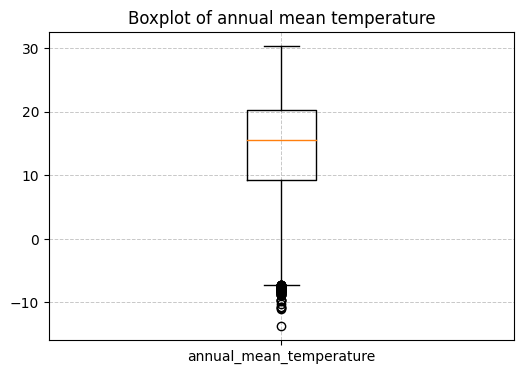

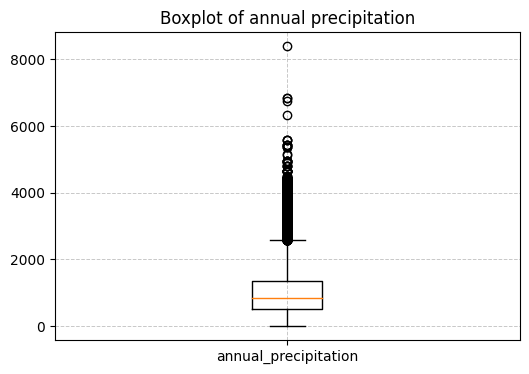

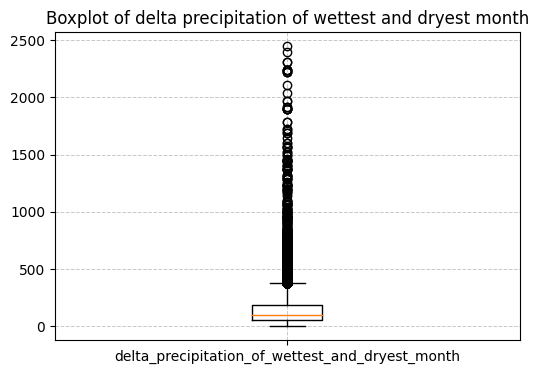

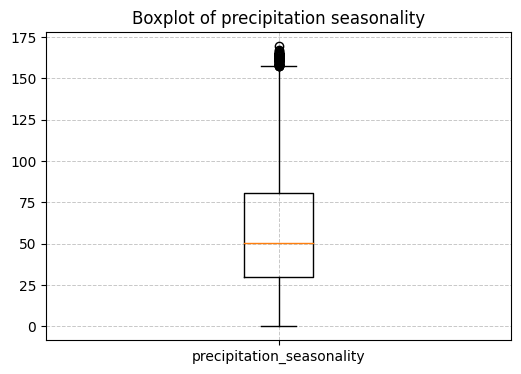

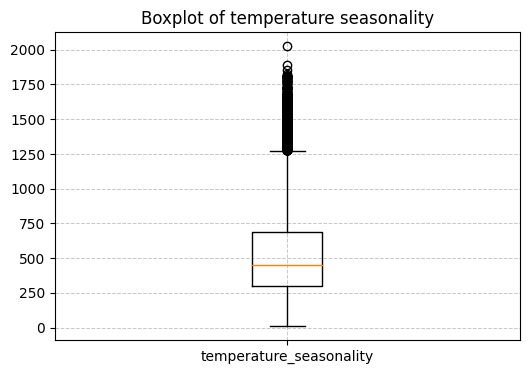

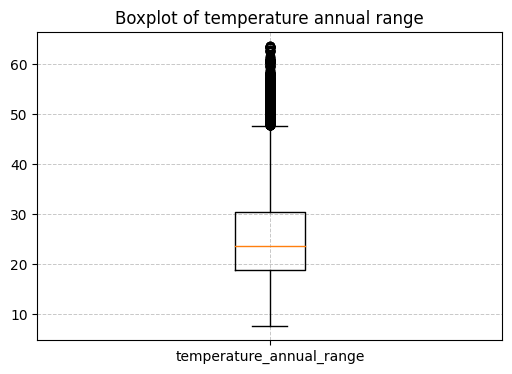

In [8]:
for column in df.iloc[:, 1:]:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], labels=[column])
    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    title = column.replace("_", " ")
    plt.title(f"Boxplot of {title}")

array([[<Axes: title={'center': 'annual_mean_temperature'}>,
        <Axes: title={'center': 'annual_precipitation'}>],
       [<Axes: title={'center': 'delta_precipitation_of_wettest_and_dryest_month'}>,
        <Axes: title={'center': 'precipitation_seasonality'}>],
       [<Axes: title={'center': 'temperature_seasonality'}>,
        <Axes: title={'center': 'temperature_annual_range'}>]],
      dtype=object)

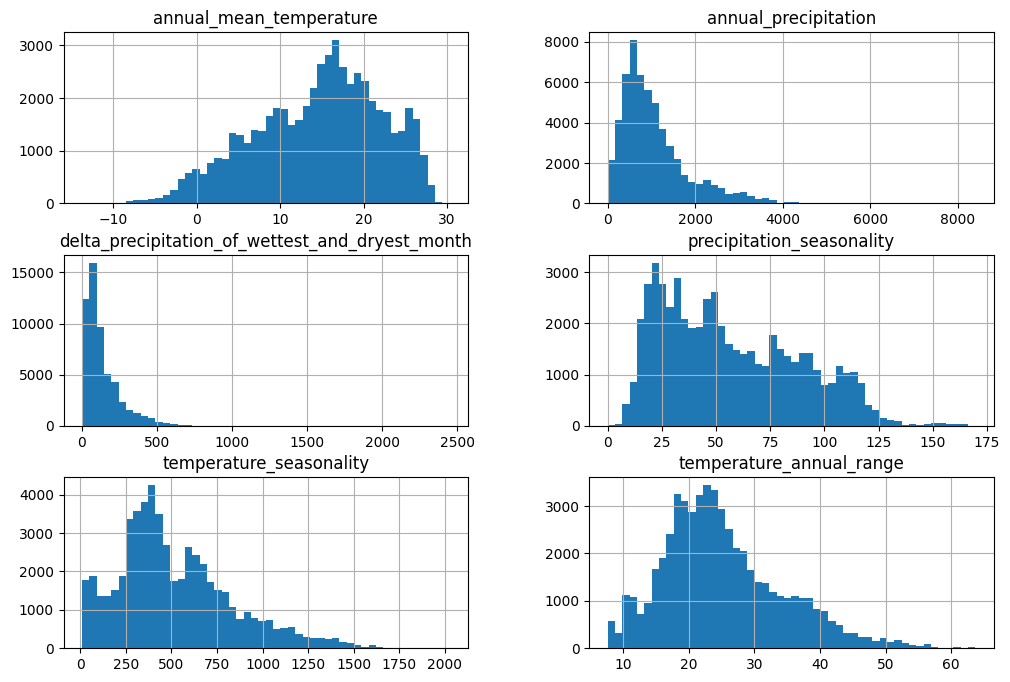

In [9]:
df.iloc[:,1:].hist(bins=50, figsize=(12, 8))

## Heatmap to show correlations between distinct columns

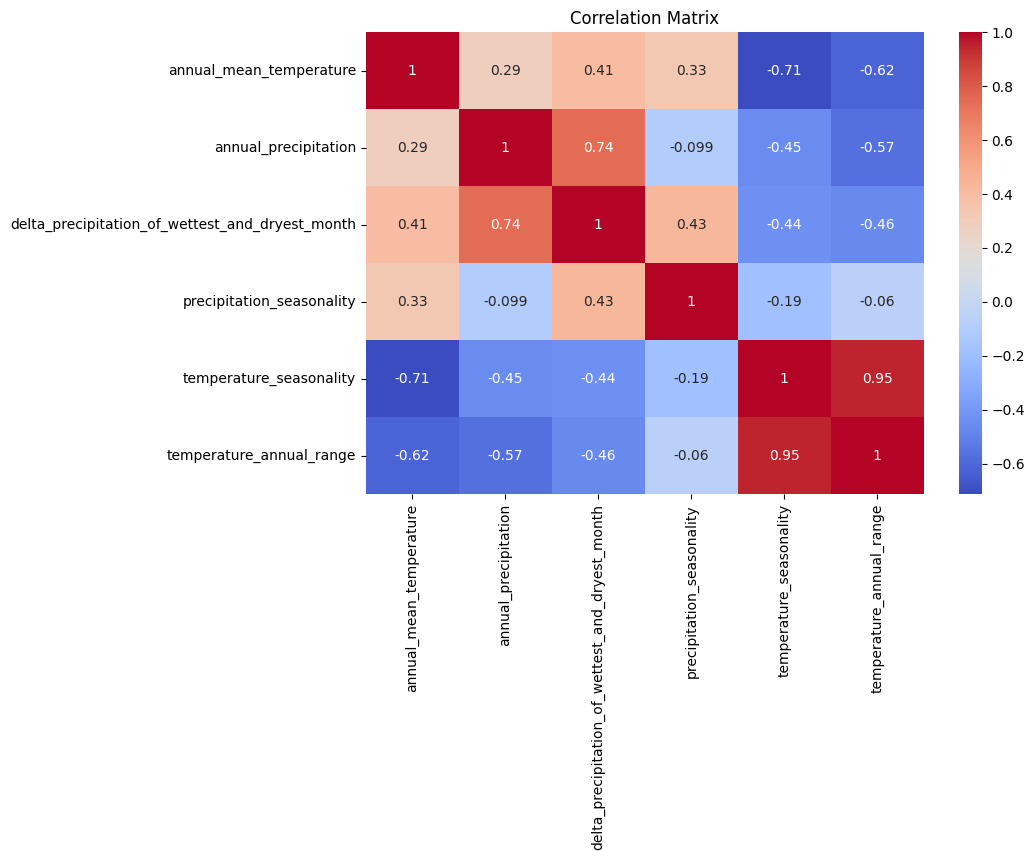

In [10]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Deeper dive into some of the correlations

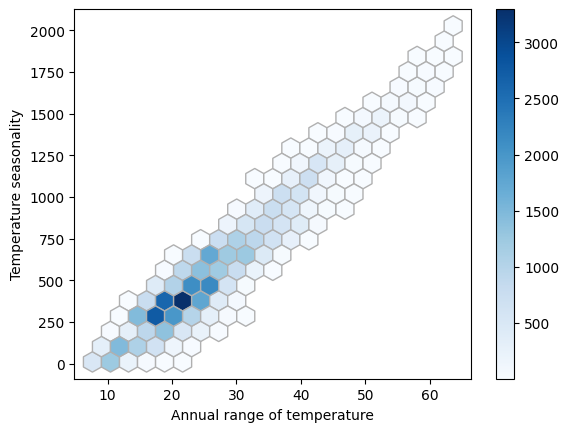

In [11]:
plt.hexbin(df['temperature_annual_range'], df['temperature_seasonality'], gridsize=20, cmap='Blues', mincnt=1, edgecolors="#B0B0B0")
plt.xlabel("Annual range of temperature")
plt.ylabel("Temperature seasonality")
plt.colorbar()
plt.show()

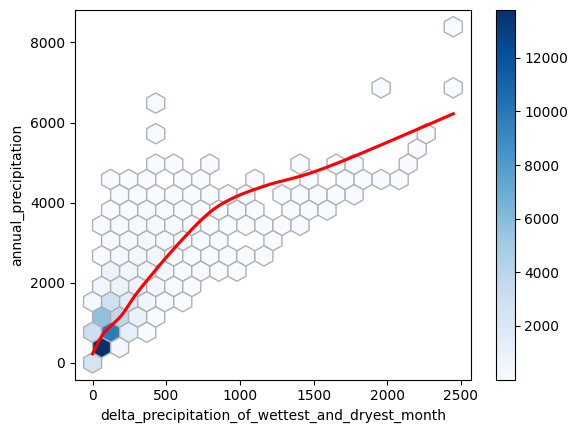

In [12]:
plt.hexbin(df['delta_precipitation_of_wettest_and_dryest_month'], df['annual_precipitation'], gridsize=20, cmap='Blues', mincnt=1, edgecolor="#B0B0B0")
plt.xlabel('Delta precipitation of wettest and dryest_month')
plt.ylabel("Annual precipitation")
plt.colorbar()
sns.regplot(x='delta_precipitation_of_wettest_and_dryest_month', y='annual_precipitation', data=df, scatter=False, color='red', lowess=True)
plt.show()

In [ ]:
plt.hexbin(df['temperature_annual_range'], df['annual_precipitation'], gridsize=20, cmap='Blues', mincnt=1, edgecolor="#B0B0B0")
plt.xlabel('Temperature annual range')
plt.ylabel("Annual precipitation")
plt.colorbar()
sns.regplot(x='temperature_annual_range', y='annual_precipitation', data=df, scatter=False, color='red', lowess=True)
plt.show()

Observations:
- obviously the highest correlation is between temperature annual range and temperature seasonality (r = 0.95), since these are similar variables
- in order to prevent redundancy, reduce the dimensionality of those two strongly related variables
- second highest corelation is between annual precipitation and delta of the wettest and dryest month (r = 0.74), it's almost linear at first, but later on higher delta precipitation does't indicate bigger amout of precipitation 
- both of the highest corelations relate to just one of the categories(temperature or precipitation)
- highest correlation containing mix of the two categories is between annual precipitation and annual range of temperature (r = -0.57), after diving deeper, it's visible that the inversely propotional correlation is strong at first but is flattening out the bigger the range of temperature gets

## Summary
1. There are no missing values to handle.
2. Scale or standarize the variables.
3. Reduce temperature_annual_range or temperature_seasonality.
4. Apply a logarithmic transformation to delta_precipitation_of_wettest_and_dryest_month and annual_precipitation in order to reduce skewness.